# Decision Tree & Random Forrest

In [1]:
# Import required packages for this chapter

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from dmba import plotDecisionTree
from sklearn.ensemble import RandomForestClassifier


# Competitive Auctions on eBay.com

The file _eBayauctions.csv_ contains information on 1972 auctions that transacted on eBay.com during May–June 2004. The goal
is to use these data to build a model that will classify auctions as competitive or noncompetitive. A _competitive auction_ is defined as an auction with at least two bids placed on the item auctioned. The data include variables that describe the item (auction category), the seller (his/her eBay rating), and the auction terms that the seller selected (auction duration, opening price, currency, day-of-week of auction close). In addition, we have the price at which the auction closed. The task is to predict whether or not the auction will be competitive based on item (auction category), seller information (seller rating), and auction characteristics (duration and open price).

__Data Preprocessing.__ Convert variable _Duration_ into a categorical variable. Split the
data into training (60%) and validation (40%) datasets.

In [2]:
# Load the data into ebay_df dataframe

ebay_df=pd.read_csv("C:/Users/lisaj/OneDrive/Documents/Documents/MIS 536/Module7Datasets/eBayauctions.csv")


# Use critical functions to explore the dataframe using print() to show results

print(ebay_df.head())
print(ebay_df.columns)
print(ebay_df.shape)
print(ebay_df.describe)


           Category currency  sellerRating  Duration endDay  ClosePrice  \
0  Music/Movie/Game       US          3249         5    Mon        0.01   
1  Music/Movie/Game       US          3249         5    Mon        0.01   
2  Music/Movie/Game       US          3249         5    Mon        0.01   
3  Music/Movie/Game       US          3249         5    Mon        0.01   
4  Music/Movie/Game       US          3249         5    Mon        0.01   

   OpenPrice  Competitive?  
0       0.01             0  
1       0.01             0  
2       0.01             0  
3       0.01             0  
4       0.01             0  
Index(['Category', 'currency', 'sellerRating', 'Duration', 'endDay',
       'ClosePrice', 'OpenPrice', 'Competitive?'],
      dtype='object')
(1972, 8)
<bound method NDFrame.describe of               Category currency  sellerRating  Duration endDay  ClosePrice  \
0     Music/Movie/Game       US          3249         5    Mon        0.01   
1     Music/Movie/Game       US  

In [3]:
# clean the dataset.

# convert categorical variables into indicator while dropping the first column of each of them to create n-1 dummies for n categorical variables.

dummy_Category=pd.get_dummies(ebay_df['Category'])
print(dummy_Category.head(3))

ebay_df=pd.concat([ebay_df, dummy_Category], axis=1)


print(ebay_df)

# drop all the non-usable variables

ebay_new=ebay_df.drop(columns=['Category', 'ClosePrice', 'endDay', 'currency'], axis=1)
print(ebay_new)



   Antique/Art/Craft  Automotive  Books  Business/Industrial  \
0                  0           0      0                    0   
1                  0           0      0                    0   
2                  0           0      0                    0   

   Clothing/Accessories  Coins/Stamps  Collectibles  Computer  Electronics  \
0                     0             0             0         0            0   
1                     0             0             0         0            0   
2                     0             0             0         0            0   

   EverythingElse  Health/Beauty  Home/Garden  Jewelry  Music/Movie/Game  \
0               0              0            0        0                 1   
1               0              0            0        0                 1   
2               0              0            0        0                 1   

   Photography  Pottery/Glass  SportingGoods  Toys/Hobbies  
0            0              0              0             0  
1  

In [4]:
# remove question mark from response name

ebay_new=ebay_new.rename(columns={'Competitive?': 'Competitive'})
print(ebay_new.columns)
                                
# convert variable Duration to categorical data type

#ebay_df.Duration=ebay_df.Duration.astype('category')
#print(ebay_df.Duration.dtypes)

dummy_Duration=pd.get_dummies(ebay_new['Duration']).rename(columns = lambda x: 'Duration_' + str(x))
print(dummy_Duration.head(3))

ebay_new=pd.concat([ebay_new, dummy_Duration], axis=1)

ebay_new=ebay_new.drop(columns=['Duration'], axis=1)


# Separate out predictors and outcome variable 

X=ebay_new[['Antique/Art/Craft', 'Automotive',  'Books',  'Business/Industrial', 'Clothing/Accessories',  'Coins/Stamps',  
'Collectibles',  'Computer',  'Electronics', 'EverythingElse',  'Health/Beauty',  'Home/Garden',  'Jewelry',  'Music/Movie/Game',
'Photography',  'Pottery/Glass',  'SportingGoods',  'Toys/Hobbies', 'sellerRating', 'OpenPrice', 'Duration_1', 'Duration_3', 'Duration_5', 'Duration_7', 'Duration_10']]

y=ebay_new['Competitive']

print(X.head(), "\n", y.head())



Index(['sellerRating', 'Duration', 'OpenPrice', 'Competitive',
       'Antique/Art/Craft', 'Automotive', 'Books', 'Business/Industrial',
       'Clothing/Accessories', 'Coins/Stamps', 'Collectibles', 'Computer',
       'Electronics', 'EverythingElse', 'Health/Beauty', 'Home/Garden',
       'Jewelry', 'Music/Movie/Game', 'Photography', 'Pottery/Glass',
       'SportingGoods', 'Toys/Hobbies'],
      dtype='object')
   Duration_1  Duration_3  Duration_5  Duration_7  Duration_10
0           0           0           1           0            0
1           0           0           1           0            0
2           0           0           1           0            0
   Antique/Art/Craft  Automotive  Books  Business/Industrial  \
0                  0           0      0                    0   
1                  0           0      0                    0   
2                  0           0      0                    0   
3                  0           0      0                    0   
4          

In [5]:
# partition the data into training (60%) and validation (40%) sets. use random_state=1 for reproducibility of results

training_X, valid_X, training_y, valid_y=train_test_split(X, y, test_size=0.4, random_state=1)

print(training_X.shape)


(1183, 25)


0.6920152091254753
[0.6641318124207858, 0.7072243346007605, 0.7249683143219265, 0.7072243346007605, 0.6907477820025348, 0.70595690747782, 0.7122940430925222, 0.7262357414448669, 0.6996197718631179, 0.7072243346007605, 0.6996197718631179, 0.7021546261089987, 0.6894803548795945, 0.6945500633713562, 0.6894803548795945, 0.6907477820025348, 0.688212927756654, 0.6907477820025348, 0.6894803548795945, 0.6932826362484157]


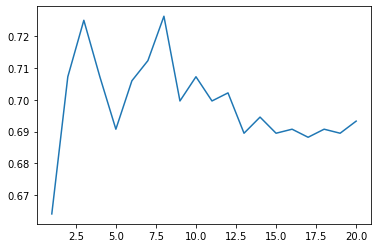

In [6]:
# Calculate the scores of the trees with 1-20 max_depth
# graph the results

tree=DecisionTreeClassifier(random_state=1)
tree.fit(training_X, training_y)

print(tree.score(valid_X, valid_y))
plotDecisionTree(tree, feature_names=training_X.columns)
# I can't get the decision tree plot code above to work. I don't know if it's because my code is incorrect or if the decision tree is simply too big to plot in a Jupyter notebook. 
# I would have liked to have seen the decision tree to see if other predictors besides the ones (opening price & seller rating) in the tree at the end of the exercise appear. 
scores=[]

for i in range(1, 21):
    tree=DecisionTreeClassifier(random_state=1, max_depth=i)
    tree.fit(training_X, training_y)
    scores.append(tree.score(valid_X, valid_y))

print(scores)

plt.plot(range(1,21), scores)
plt.show()


0.7072243346007605


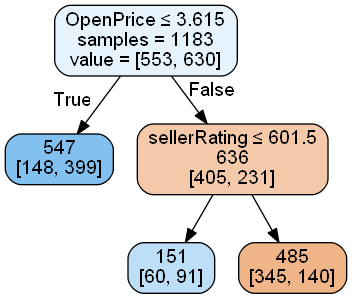

In [7]:
# prune the tree with the max_depth you have discovered to provide the best fit.
# set max_depth=3, min_samples_split=50, min_impurity_decrease=0.01, random_state=1 for your classifier
# print the score the pruned tree.

pruned_tree=DecisionTreeClassifier(random_state=1, max_depth=3, min_samples_split=50, min_impurity_decrease=0.01)
pruned_tree.fit(training_X, training_y)

print(pruned_tree.score(valid_X, valid_y))

plotDecisionTree(pruned_tree, feature_names=training_X.columns)


In [8]:
# Which features tend to be more relevant? Use data to back your answer.

#The opening price and seller rating appear to be the most relevant features in this decision tree. These features help determine whether or not an eBay auction in the sample 
# is competitive. If the opening price is greater than or equal to 3.615, the auction is not competitive. If the opening price is less than or equal to 3.615, the auction is competitive. 
#If the seller rating is less than or equal to 601.5, the auction is not competitive.


In [9]:
# Interpret your results:

#I don't know if my results are correct. I am really surprised that none of the dummy variables created earlier in this exercise appear in the decision tree above. If my results are correct,
#the opening price in the root node is the most important predictor, and its splitting value for the split is less than or equal to 3.615. The samples number is the number of records in the root node (1183). 
#The values show the counts of the two classes. 553 is the number of records that are competitive, and 630 is the number of records that are not competitive. 
# The accuracy score for this decision tree is .71, which means that it's 71% more explanatory than random guessing is.  


# Lesson learned from this excercise:

# I learned that a decision tree can be used to illustrate the most important predictors in determining whether or not an eBay auction is competitive. If the decision tree above is
# accurate, the opening price and seller rating are much more important in determining whether an eBay auction is competitive than auction category and duration are. 


# Predicting Delayed Flights

The file _flightdelays.csv_ contains information on all commercial flights departing the Washington, DC area and arriving at New York during January 2004. For each flight, there is information on the departure and arrival airports, the distance of the route, the scheduled time and date of the flight, and so on. The variable that we are trying to predict is whether or not a flight is delayed. A delay is defined as an arrival that is at least 15 minutes later than scheduled. The predictors we are using are CARRIER, DEST, DISTANCE, ORIGIN, Weather, DAY_WEEK, and CRS_DEP_TIME.

__Data Preprocessing.__ Transform variable day of week info (DAY_WEEK), carrier name (CARRIER), desitnation (DEST) a categorical variable. Bin the scheduled departure time (CRS_DEP_TIME) into eight bins. Partition the data into training (60%) and validation (40%) sets.

In [10]:
# Load the data into delays_df dataframe
# Use critical functions to explore the dataframe using print() to show results

delays_df=pd.read_csv("C:/Users/lisaj/OneDrive/Documents/Documents/MIS 536/Module7Datasets/flightdelays.csv")

print(delays_df.head())
print(delays_df.columns)
print(delays_df.shape)
print(delays_df.describe)


   CRS_DEP_TIME CARRIER  DEP_TIME DEST  DISTANCE     FL_DATE  FL_NUM ORIGIN  \
0          1455      OH      1455  JFK       184  01/01/2004    5935    BWI   
1          1640      DH      1640  JFK       213  01/01/2004    6155    DCA   
2          1245      DH      1245  LGA       229  01/01/2004    7208    IAD   
3          1715      DH      1709  LGA       229  01/01/2004    7215    IAD   
4          1039      DH      1035  LGA       229  01/01/2004    7792    IAD   

   Weather  DAY_WEEK  DAY_OF_MONTH TAIL_NUM Flight Status  
0        0         4             1   N940CA        ontime  
1        0         4             1   N405FJ        ontime  
2        0         4             1   N695BR        ontime  
3        0         4             1   N662BR        ontime  
4        0         4             1   N698BR        ontime  
Index(['CRS_DEP_TIME', 'CARRIER', 'DEP_TIME', 'DEST', 'DISTANCE', 'FL_DATE',
       'FL_NUM', 'ORIGIN', 'Weather', 'DAY_WEEK', 'DAY_OF_MONTH', 'TAIL_NUM',
       'Fl

In [11]:
# convert variable DAY_WEEK to categorical data type

# EVERYTIME I TURN DAY_WEEK INTO A CATEGORICAL VARIABLE, SOME OF THE DATA DISAPPEARS FROM THE DATA SET, AND I GET NaN values. THE CODE I USED TO TRANSFORM THE VARIABLE INTO A CATEGORICAL VARIABLE
# IS BELOW, BUT I'M GOING TO LEAVE THIS VARIABLE AS IT IS FOR NOW.

#dummy_DAY_WEEK=pd.get_dummies(delays_df['DAY_WEEK'])

#delays_df=pd.concat([delays_df, dummy_DAY_WEEK])
#print(delays_df)

#delays_df=delays_df.rename(columns={1: 'Day_1', 2: 'Day_2', 3: 'Day_3', 4: 'Day_4', 5: 'Day_5', 6: 'Day_6', 7: 'Day_7'})

#I'm going to assume that I should remove the variables that aren't required for this exercise. 

delays_new=delays_df.drop(columns=['DEP_TIME', 'FL_DATE', 'FL_NUM', 'DAY_OF_MONTH', 'TAIL_NUM'], axis=1)
print(delays_new)

#I'm also going to assume that I need to rename the column 'Flight Status.' 

delays_new=delays_new.rename(columns={'Flight Status': 'Flight_Status'})
print(delays_new)




      CRS_DEP_TIME CARRIER DEST  DISTANCE ORIGIN  Weather  DAY_WEEK  \
0             1455      OH  JFK       184    BWI        0         4   
1             1640      DH  JFK       213    DCA        0         4   
2             1245      DH  LGA       229    IAD        0         4   
3             1715      DH  LGA       229    IAD        0         4   
4             1039      DH  LGA       229    IAD        0         4   
...            ...     ...  ...       ...    ...      ...       ...   
2196           645      RU  EWR       199    DCA        0         6   
2197          1700      RU  EWR       213    IAD        0         6   
2198          1600      RU  EWR       199    DCA        0         6   
2199          1359      RU  EWR       199    DCA        0         6   
2200          1730      RU  EWR       199    DCA        0         6   

     Flight Status  
0           ontime  
1           ontime  
2           ontime  
3           ontime  
4           ontime  
...            ...  


In [12]:
# bin CRS_DEP_TIME variable into 8 bins
# equal width binning method is suitable in this case becuase the flights are departing a certain frequency.
# binning in this case is useful because the flight dep time has too much more categorical values in a column than necessary. 
# the following code is given to you.

delays_new['binned_CRS_DEP_TIME'] = pd.cut(delays_df.CRS_DEP_TIME, 8, labels=False)
delays_new['binned_CRS_DEP_TIME'].astype('category')

0       4
1       5
2       3
3       5
4       2
       ..
2196    0
2197    5
2198    5
2199    3
2200    5
Name: binned_CRS_DEP_TIME, Length: 2201, dtype: category
Categories (8, int64): [0, 1, 2, 3, 4, 5, 6, 7]

In [13]:
# construct predictors (X) and outcome (y)

X=delays_new[["CARRIER", "DEST", "binned_CRS_DEP_TIME", "DISTANCE", "ORIGIN", "Weather", 'DAY_WEEK']]
y=delays_new["Flight_Status"]

print(X.head(), "\n", y.head())


  CARRIER DEST  binned_CRS_DEP_TIME  DISTANCE ORIGIN  Weather  DAY_WEEK
0      OH  JFK                    4       184    BWI        0         4
1      DH  JFK                    5       213    DCA        0         4
2      DH  LGA                    3       229    IAD        0         4
3      DH  LGA                    5       229    IAD        0         4
4      DH  LGA                    2       229    IAD        0         4 
 0    ontime
1    ontime
2    ontime
3    ontime
4    ontime
Name: Flight_Status, dtype: object


In [14]:
# create dummies for categorical variables

dummy_CARRIER=pd.get_dummies(delays_new['CARRIER'])
print(dummy_CARRIER.head(3))

dummy_DEST=pd.get_dummies(delays_new['DEST'])
print(dummy_DEST.head(3))

dummy_ORIGIN=pd.get_dummies(delays_new['ORIGIN'])
print(dummy_ORIGIN.head(3))

dummy_Flight_Status=pd.get_dummies(delays_new['Flight_Status'])
print(dummy_Flight_Status.head(3))

dummy_DAY_WEEK=pd.get_dummies(delays_new['DAY_WEEK'])
print(dummy_DAY_WEEK.head(3))

#delays_new=pd.concat([delays_new, dummy_CARRIER, dummy_DEST, dummy_ORIGIN, dummy_Flight_Status, dummy_DAY_WEEK], axis=1)
delays_new=pd.concat([delays_new, dummy_CARRIER], axis=1)
delays_new=pd.concat([delays_new, dummy_DEST], axis=1) 
delays_new=pd.concat([delays_new, dummy_ORIGIN], axis=1)
delays_new=pd.concat([delays_new, dummy_Flight_Status], axis=1)
delays_new=pd.concat([delays_new, dummy_DAY_WEEK], axis=1)

print(delays_new)

delays_new=delays_new.rename(columns={1: 'DAY_1', 2: 'DAY_2', 3: 'DAY_3', 4: 'DAY_4', 5: 'DAY_5', 6: 'DAY_6', 7: 'DAY_7'})
print(delays_new)

delays_final=delays_new.drop(columns=['CARRIER', 'DEST', 'ORIGIN', 'Flight_Status', 'DAY_WEEK', 'CRS_DEP_TIME'], axis=1)
print(delays_final)

X=delays_final[["CO", "DH", "binned_CRS_DEP_TIME", "DL", "MQ", "OH", "RU", "UA", "US", "EWR", "JFK", "LGA", "BWI", "DCA", "DAY_1", "DAY_2", "DAY_3", "DAY_4", "DAY_5", "DAY_6", "DAY_7"]]
y=delays_final["delayed"]

print(X.head(), "\n", y.head())


   CO  DH  DL  MQ  OH  RU  UA  US
0   0   0   0   0   1   0   0   0
1   0   1   0   0   0   0   0   0
2   0   1   0   0   0   0   0   0
   EWR  JFK  LGA
0    0    1    0
1    0    1    0
2    0    0    1
   BWI  DCA  IAD
0    1    0    0
1    0    1    0
2    0    0    1
   delayed  ontime
0        0       1
1        0       1
2        0       1
   1  2  3  4  5  6  7
0  0  0  0  1  0  0  0
1  0  0  0  1  0  0  0
2  0  0  0  1  0  0  0
      CRS_DEP_TIME CARRIER DEST  DISTANCE ORIGIN  Weather  DAY_WEEK  \
0             1455      OH  JFK       184    BWI        0         4   
1             1640      DH  JFK       213    DCA        0         4   
2             1245      DH  LGA       229    IAD        0         4   
3             1715      DH  LGA       229    IAD        0         4   
4             1039      DH  LGA       229    IAD        0         4   
...            ...     ...  ...       ...    ...      ...       ...   
2196           645      RU  EWR       199    DCA        0      

In [15]:
# Partition the data into training (60%) and validation (40%) sets.

training_X, valid_X, training_y, valid_y=train_test_split(X, y, test_size=0.4, random_state=1)
print(training_X.shape)


(1320, 21)


In [16]:
# create the random forest

forest=RandomForestClassifier(random_state=5, n_estimators=101, max_features="sqrt")


In [17]:
# train the forest
# fit the model
# evaluate the model on validation set.

forest.fit(training_X, training_y)
print(forest.score(valid_X, valid_y))


0.753688989784336


In [18]:
# Which features tend to be more relevant? Use score to back up your answer.

importances=forest.feature_importances_

for i in range(len(importances)):
    print(valid_X.columns[i], ": ", importances[i])
    
# Scheduled departure time and flying on Day 1 and Day 5 of the week appear to have the most impact on whether or not a flight is on time. The scheduled departure time has the greatest impact with an 
#accuracy score of .43. Flying on days 1 and 5 of the week also have the second (.046) and third (.039) highest scores of all the predictors on whether or not a flight is delayed.


CO :  0.011005838887453687
DH :  0.023333985860322377
binned_CRS_DEP_TIME :  0.4476822601325197
DL :  0.027707856572116007
MQ :  0.03511582418373134
OH :  0.0025156213835662066
RU :  0.01723852901146808
UA :  0.0032340585717522507
US :  0.02440758038205556
EWR :  0.022520860561605505
JFK :  0.030285092030384434
LGA :  0.03499975639693218
BWI :  0.020406823873138868
DCA :  0.03429106363335008
DAY_1 :  0.04604623155698871
DAY_2 :  0.036859406884807065
DAY_3 :  0.03348591094306166
DAY_4 :  0.037470152064270734
DAY_5 :  0.039324977059571053
DAY_6 :  0.03546703937070134
DAY_7 :  0.036601130640203164


In [19]:
# Interpret your results:

#As noted above, scheduled departure time and flying on days 1 and 5 of the week are the most important variables in predicting if a flight was delayed. I am surprised that 
# the flight location origin and flight destination location were less important in predicting a flight delay. The carrier is even less important in predicting if a flight is delayed.


# Lesson learned from this excercise:

# I learned how to create a random forest in this exercise using the flight delays data set. Creating dummy variables for day of the week, flight origin, and flight destination, allowed
# me to pinpoint exactly which days of the week, carriers, flight origin locations, or flight destinations could potentially be the most significant predictors in 
#determining whether or not a flight is delayed.
